In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import soaplite
import genBasis
import ase
from ase.visualize import view
from ase.build import bulk
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as p
import numpy.linalg as nl
from scipy.optimize import fmin
import scipy.optimize as op
import time
%matplotlib inline

In [2]:
myAlphas, myBetas = genBasis.getBasisFunc(10.0, 5) # input: (rCut, NradBas)
rCut = 10.0
NradBas = 5
Lmax = 5

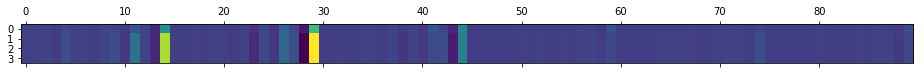

In [4]:
struct2 = bulk('Cu', 'fcc', a=3.6, cubic=True)
view(struct2)
mat2 = soaplite.get_periodic_soap_structure(struct2, myAlphas, myBetas, rCut, NradBas, Lmax)
p.matshow(mat2)

[[0.  0.  0. ]
 [0.  2.  1.8]
 [2.  0.  1.8]
 [2.  2.  0. ]]


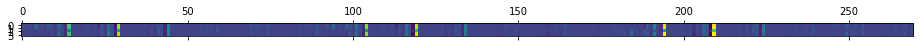

In [16]:
a0 = 4.0
c0 = 0.9 * a0 #https://link.springer.com/content/pdf/10.1007/BF03215214.pdf'
struct3 = bulk('Au', 'fcc', a=a0, cubic=True)
struct3.set_cell(np.diag((a0,a0,c0)), scale_atoms=True)
print(struct3.get_positions())
struct3.set_chemical_symbols(('Au','Cu','Cu','Au'))
view(struct3)
mat3 = soaplite.get_periodic_soap_structure(struct3, myAlphas, myBetas, rCut, NradBas, Lmax)
p.matshow(mat3)